In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

In [3]:
# Define data generators for train, validation and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/naruto and pokemon/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 856 images belonging to 2 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/naruto and pokemon/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 213 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/naruto and pokemon/test',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 324 images belonging to 1 classes.


In [8]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,validation_data=val_generator,epochs=5)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
27/27 [==============================] - 307s 11s/step - loss: 0.2344 - accuracy: 0.9089 - val_loss: 0.0995 - val_accuracy: 0.9577
Epoch 2/5
27/27 [==============================] - 93s 3s/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.1907 - val_accuracy: 0.9108
Epoch 3/5
27/27 [==============================] - 93s 3s/step - loss: 0.0380 - accuracy: 0.9860 - val_loss: 0.0106 - val_accuracy: 0.9953
Epoch 4/5
27/27 [==============================] - 92s 3s/step - loss: 9.8628e-04 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9906
Epoch 5/5
27/27 [==============================] - 93s 3s/step - loss: 0.0026 - accuracy: 0.9988 - val_loss: 0.0095 - val_accuracy: 0.9953


In [11]:
model.save("Model.h5","label.txt")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 120ms/step


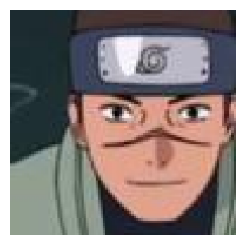

Prediction: naruto character (Probability: 4.5749534e-06 )


In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
# Load the saved model
model = load_model('/content/Model.h5')
# Load and preprocess the test image
test_image_path = '/content/drive/MyDrive/naruto and pokemon/test/both/4471.jpg'
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Normalize the pixel values
# Make predictions
prediction = model.predict(img_array)
#print the input image
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.show()
# Print the prediction
if prediction < 0.5:
    print("Prediction: naruto character (Probability:", prediction[0][0], ")")
else:
    print("Prediction: pokemon (Probability:", prediction[0][0], ")")